# Matt Sloane / ms9548
## Homework 11, Assignment 1

In [63]:
# Import modules / setup notebook environment
from geopandas import GeoDataFrame
import numpy as np
import pandas as pd
import os
import zipfile
import json
from fiona.crs import from_epsg
import pylab as pl
import shapely
%pylab inline

s = json.load(open(os.getenv("PUIDATA")+'/fbb_matplotlibrc.json'))
pl.rcParams.update(s)   

pui_Data = os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [55]:
# Get necessary data

def get_Data():
    '''
    Function to obtain Homework 11, Assignment 1 data, including:
    1.  NYC 2010 Census Block Shapefiles
    '''
    # Make New Directory for Data
    os.system("mkdir " + pui_Data + "/HW11_Data")
    
    # Downloand Data from NYC Bytes of the Big Apple
    os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip")
    
    # Move Data to New Directory
    os.system("mv " + "nycb2010_16d.zip " + os.getenv("PUIDATA")+"/HW11_Data")
    
    # Unzip files
    os.system("unzip " + pui_Data + "/HW11_Data/" + "nycb2010_16d.zip -d " + pui_Data + "/HW11_Data")
    
    # Remove Original Zip File
    os.system("rm " + pui_Data + "/HW11_Data/nycb2010_16d.zip")

get_Data()
    

In [58]:
# Load Data into Dataframe and view Dataframe
shape_path = pui_Data + "/HW11_Data/nycb2010_16d/nycb2010.shp"
cb_shape = GeoDataFrame.from_file(shape_path)
cb_shape.head()

BCTCB2010 BoroCode       BoroName CB2010  CT2010     Shape_Area  \
0  50009001000        5  Staten Island   1000  000900  244589.603884   
1  50020011000        5  Staten Island   1000  002001  111006.286826   
2  50027001000        5  Staten Island   1000  002700  150406.766022   
3  50040001000        5  Staten Island   1000  004000  141296.561149   
4  50064001000        5  Staten Island   1000  006400  200784.983607   

    Shape_Leng                                           geometry  
0  2508.948115  POLYGON ((962269.1260375977 173705.5001831055,...  
1  1345.886422  POLYGON ((964642.2676391602 161835.2651977539,...  
2  1703.381172  POLYGON ((963363.1168212891 167356.3336181641,...  
3  1511.173743  POLYGON ((960069.9965820312 161953.6936035156,...  
4  1978.243852  POLYGON ((963023.891784668 158246.7521972656, ...

In [59]:
# Reduce to Brooklyn Borough Census Tracts Only
cb_bk = cb_shape.loc[cb_shape["BoroName"] == "Brooklyn"]
cb_bk.head(10)

BCTCB2010 BoroCode  BoroName CB2010  CT2010     Shape_Area  \
5037  30002001000        3  Brooklyn   1000  000200  208484.989566   
5038  30003011000        3  Brooklyn   1000  000301   63365.958361   
5039  30005011000        3  Brooklyn   1000  000501  116303.194723   
5040  30011001000        3  Brooklyn   1000  001100   54802.306859   
5041  30015001000        3  Brooklyn   1000  001500   79196.530872   
5042  30020001000        3  Brooklyn   1000  002000  203150.927230   
5043  30022001000        3  Brooklyn   1000  002200  202989.817092   
5044  30030001000        3  Brooklyn   1000  003000    2288.488412   
5045  30031001000        3  Brooklyn   1000  003100  214447.259568   
5046  30033001000        3  Brooklyn   1000  003300  258228.648239   

       Shape_Leng                                           geometry  
5037  2097.493132  POLYGON ((982421.0634155273 178133.8510131836,...  
5038  1006.913933  POLYGON ((985596.1882324219 193858.6517944336,...  
5039  1431.900698  POLYGON ((986271.9053955078 193612.9270019531,...  
5040   951.657541  POLYGON ((988369.8604125977 192442.1943969727,...  
5041  1129.348482  POLYGON ((988949.616394043 193714.8265991211, ...  
5042  2076.660170  POLYGON ((980646.208190918 175890.9813842773, ...  
5043  2080.720191  POLYGON ((978906.6284179688 174942.8699951172,...  
5044   251.742624  POLYGON ((976961.3206176758 172481.1130371094,...  
5045  1902.577167  POLYGON ((990398.8098144531 191915.4371948242,...  
5046  2448.507197  POLYGON ((991153.7886352539 190552.8186035156,...

In [61]:
# Convert Coordinate Systems to Lat / Long - input from Kelsey Reid / KDR276
cb_bk.crs = from_epsg(2263)
cb_latlong = cb_bk.to_crs(epsg = 4326)
cb_latlong.head()

BCTCB2010 BoroCode  BoroName CB2010  CT2010     Shape_Area  \
5037  30002001000        3  Brooklyn   1000  000200  208484.989566   
5038  30003011000        3  Brooklyn   1000  000301   63365.958361   
5039  30005011000        3  Brooklyn   1000  000501  116303.194723   
5040  30011001000        3  Brooklyn   1000  001100   54802.306859   
5041  30015001000        3  Brooklyn   1000  001500   79196.530872   

       Shape_Leng                                           geometry  
5037  2097.493132  POLYGON ((-74.00659158337982 40.65561273365177...  
5038  1006.913933  POLYGON ((-73.99514512602698 40.69877384567195...  
5039  1431.900698  POLYGON ((-73.99270830309769 40.69809925981344...  
5040   951.657541  POLYGON ((-73.98514306089652 40.69488514296981...  
5041  1129.348482  POLYGON ((-73.98305147125492 40.69837793354038...

In [62]:
print (len(cb_latlong))  # Check to see if dataframe matches Professor's stated length (~10,000 records)

9682


In [64]:
# Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP
# 1 MetroTech Lat / Long, per Google Maps: 40.6932161 / -73.9885991
cusp_loc = shapely.geometry.Point(-73.9885991,40.6932161)

In [66]:
# Loop through BK census block shapefile to see which census block One MetroTech is located in - direction provided 
# from Kelsey Reid / kdr276
for i, ct in zip(cb_latlong.index, cb_latlong.geometry):
    if shapely.geometry.asShape(ct).contains(cusp_loc):
        index = i

In [73]:
# Extract Census Block DataFrame Row that Contains One MetroTech, Based on Identified Index Value
mt_cbdf = cb_latlong[cb_latlong.index == index]
mt_cbdf

BCTCB2010 BoroCode  BoroName CB2010  CT2010     Shape_Area  \
35380  30011001002        3  Brooklyn   1002  001100  462604.348339   

        Shape_Leng                                           geometry  
35380  2917.605512  POLYGON ((-73.98716132813911 40.69496169586319...

In [79]:
# Print out Census Block
mt_cb = mt_cbdf["BCTCB2010"][index]
print ('The One MetroTech Building is located within Brooklyn Census Block {}'.format(mt_cb))

The One MetroTech Building is located within Brooklyn Census Block 30011001002


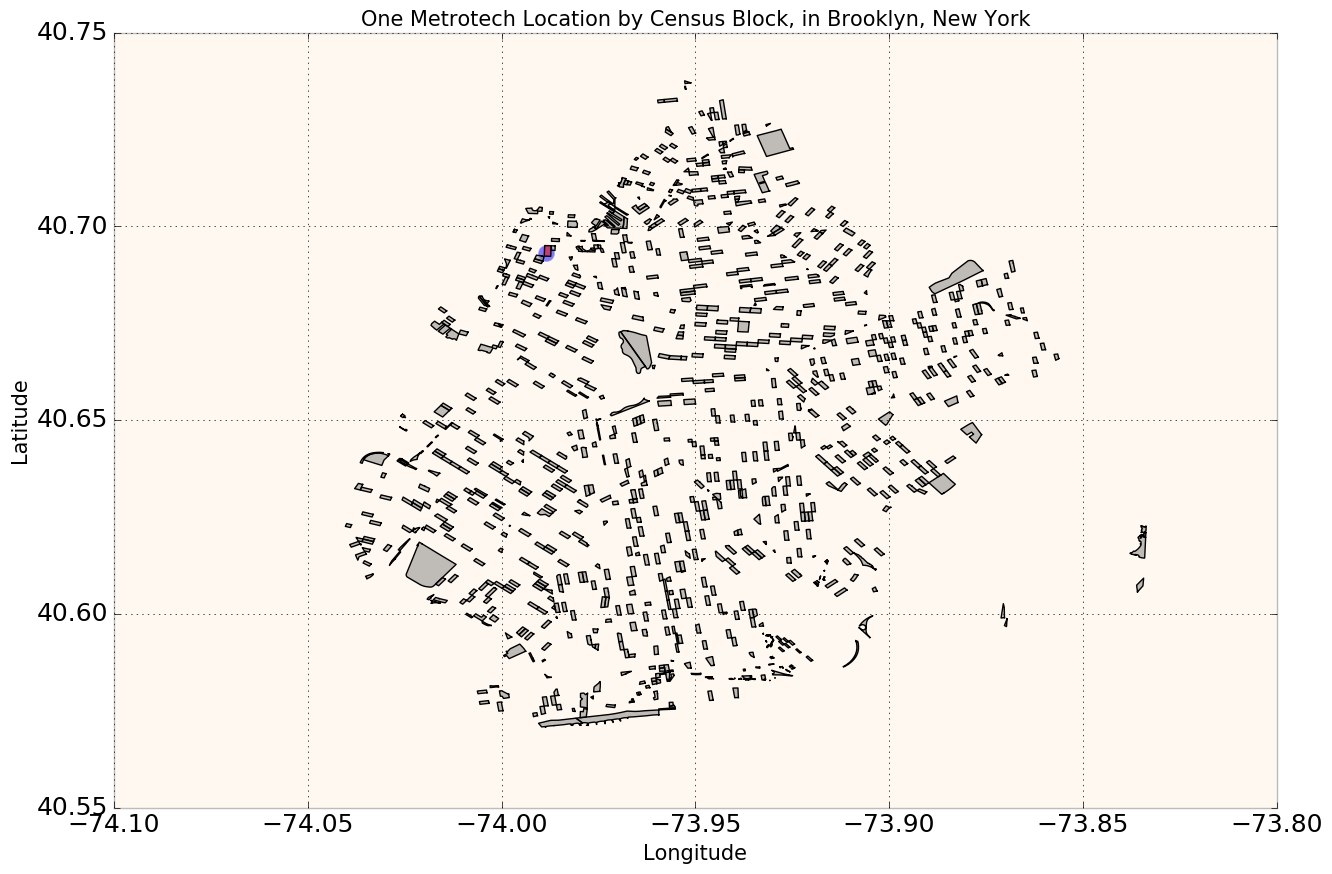

In [88]:
# Plot 1/10th BK Census Blocks and CUSP Location - direction provided from Kelsey Reid / kdr276
f, ax = plt.subplots(figsize = (15, 10))
cb_latlong[::10].plot(ax = ax, color = "grey")
mt_cbdf.plot(ax=ax, color="red")  # Plot census block that contains One MetroTech (in red)
pl.scatter(cusp_loc.x, cusp_loc.y, s = 150, alpha = 0.5)
pl.title('One Metrotech Location by Census Block, in Brooklyn, New York', fontsize = 15) # Plot 1/10 census blocks
plt.xlabel("Longitude", fontsize = 15)
plt.ylabel("Latitude", fontsize = 15)

### The figure above shows every 10th census block (in grey) in Brooklyn, New York, the Census Block constaining One MetroTech (in red), and the point location of One MetroTech (transparent blue circle). 